In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.neural_network import MLPRegressor as MLP_reg
from sklearn.metrics import accuracy_score, mean_squared_error as mse
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# dataset = pd.read_csv('data/heart.csv')
# data = dataset.iloc[:,0:-1]
# label = dataset.iloc[:,-1]

# model = MLP(tol=0, hidden_layer_sizes=(10), activation = 'logistic', learning_rate_init=0.01)
# model.fit(data,label)

In [3]:
# print('score:', model.score(data,label))
# print('predictions:', model.predict(data))
# print('expected:',label.values)

# plt.plot(model.loss_curve_)
# plt.xlabel('Iterations')
# plt.ylabel('loss')
# plt.title('Gradient Descent')
# plt.show()

### Lakukan percobaan dengan meanggunakan Single Perceptron dan Multi Perceptron

#### SINGLE PERCEPTON

In [4]:
dataset = pd.read_csv('data/heart.csv')
data = dataset.iloc[:,0:-1]
label = dataset.iloc[:,-1]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

clf = Perceptron(tol=1e-3, max_iter=1000, eta0=0.1, random_state=0)
clf.fit(data_scaled, label)

Perceptron(eta0=0.1)

In [5]:
print("HEART Dataset")
print(dataset.head(3))
print(f"\nAccuracy: {clf.score(data_scaled, label)}")
print(f"\nPredictions: {clf.predict(data)}")
print(f"Predictions: {(label.values)}")

HEART Dataset
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  

Accuracy: 0.801980198019802

Predictions: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

In [6]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(data, label)

print("HEART Dataset")
print(dataset.tail(3))
print(f"\nAccuracy: {clf.score(data, label)}")
print(f"\nPredictions: {clf.predict(data)}")
print(f"Predictions: {(label.values)}")

HEART Dataset
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

Accuracy: 0.6567656765676567

Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0
 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 

In [7]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.2, random_state=0)
clf = make_pipeline(StandardScaler(), Perceptron(tol=1e-3,random_state=0, max_iter=1000, eta0=0.1, penalty='l2'))
clf.fit(data_train, label_train)

print("HEART Dataset")
print(dataset.head(5))
print(f"\nTraining Accuracy: {clf.score(data_train, label_train)}")
print(f"Test Accuracy: {clf.score(data_test, label_test)}")
print(f"\nTraining Predictions: {clf.predict(data_train)}")
print(f"Test Predictions: {clf.predict(data_test)}")

HEART Dataset
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Training Accuracy: 0.7933884297520661
Test Accuracy: 0.7377049180327869

Training Predictions: [1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1
 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Akurasi: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Akurasi: 78.69%
Precision: 85.19%
Recall: 71.88%
F1 Score: 77.97%


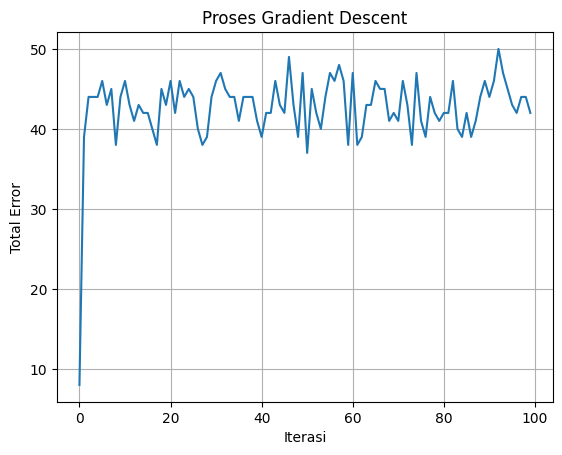

In [9]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

class SimplePerceptron:
    def __init__(self, lr=0.01, n_iter=100):
        self.lr = lr  # learning rate
        self.n_iter = n_iter  # jumlah iterasi
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.losses = []

        # Pelatihan
        for _ in range(self.n_iter):
            total_error = 0
            for i in range(X.shape[0]):
                # Prediksi
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = step_function(linear_output)

                # Update bobot dan bias berdasarkan kesalahan
                error = y[i] - y_pred
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error

                # Hitung error total untuk plot gradient descent
                total_error += error**2

            # Simpan total error di setiap iterasi
            self.losses.append(total_error)
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return step_function(linear_output)

scaler = StandardScaler()
data = scaler.fit_transform(data)
perceptron = SimplePerceptron(lr=0.01, n_iter=100)
perceptron.fit(data, label)

plt.plot(perceptron.losses)
plt.title('Proses Gradient Descent')
plt.xlabel('Iterasi')
plt.ylabel('Total Error')
plt.grid(True)
plt.show()

In [10]:
from sklearn.svm import SVC

# Menggunakan SVM
model = SVC(kernel='linear', C=1, random_state=0)
model.fit(data, label)
print(f"Accuracy: {model.score(data, label)}")

Accuracy: 0.8547854785478548


#### MULTILAYER

In [11]:
# def mse(actual, pred):
#     actual, pred = np.array(actual), np.array(pred)
#     return np.square(np.subtract(actual,pred)).mean()

In [12]:
# mlp = MLP(hidden_layer_sizes=(10,), max_iter=10000, random_state=0)
# mlp.fit(data, label)

# print("HEART Dataset")
# print(dataset.head(5))
# print(f"\nAccuracy: {mlp.score(data, label)}")

In [13]:
model = MLP(tol=1e-6, hidden_layer_sizes=(10,30,50), activation = 'logistic', 
            learning_rate_init=0.005, random_state=0)
model.fit(data,label)

print("HEART Dataset")
print(dataset.head(5))
print(f"\nAccuracy: {model.score(data, label)}")

HEART Dataset
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Accuracy: 0.8976897689768977


Predictions: [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1]

Expected: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0

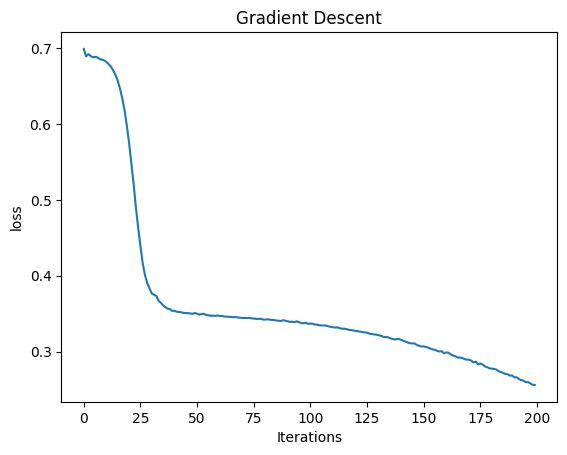

In [14]:
print(f"Predictions: {model.predict(data)}")
print(f"\nExpected: {(label.values)}")

plt.plot(model.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.title('Gradient Descent')
plt.show()

======< HEART Dataset >======
Iteration 50: Accuracy = 0.94, MSE = 0.06
Iteration 100: Accuracy = 0.98, MSE = 0.02
Iteration 150: Accuracy = 0.99, MSE = 0.01
Iteration 200: Accuracy = 1.00, MSE = 0.00
Iteration 300: Accuracy = 1.00, MSE = 0.00
Iteration 400: Accuracy = 1.00, MSE = 0.00
Iteration 500: Accuracy = 1.00, MSE = 0.00


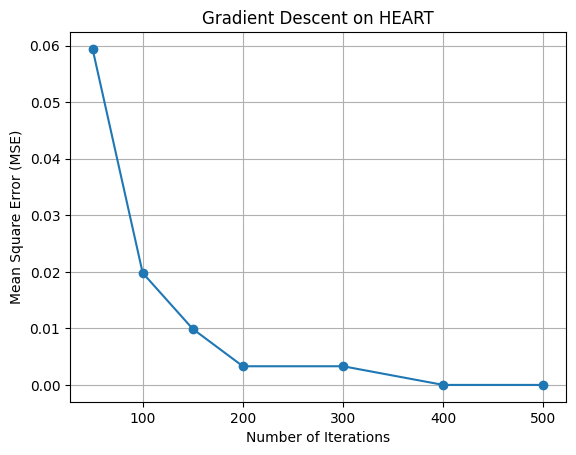

In [15]:
iterations = np.array([50, 100, 150, 200,300,400,500])
errors = []
print('======< HEART Dataset >======')
for i in range(len(iterations)):
    model = MLP(hidden_layer_sizes=(10), max_iter=iterations[i], 
                activation='logistic', learning_rate_init=0.1, random_state=42)
    model.fit(data, label) 
    pred = model.predict(data)  
    error = mse(label, pred)
    errors.append(error)
    print(f'Iteration {iterations[i]}: Accuracy = {model.score(data, label):.2f}, 
          MSE = {error:.2f}')

plt.plot(iterations, errors, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Gradient Descent on HEART')
plt.grid(True)
plt.show()

### Lakukan dengan menggunakan miu=0.1, layer = 5, 10, 15, 20, 25

========< HEART Dataset >========

Accuracy dengan hidden layer 5 = 94.06%
Accuracy dengan hidden layer 10 = 99.34%
Accuracy dengan hidden layer 15 = 99.67%
Accuracy dengan hidden layer 20 = 100.00%
Accuracy dengan hidden layer 25 = 100.00%


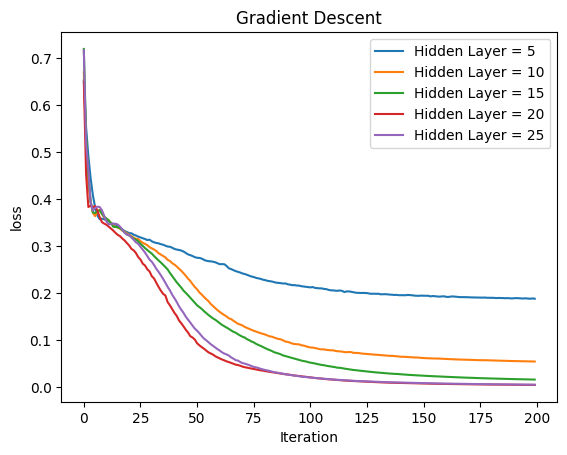

In [16]:
layer_sizes = [5, 10, 15, 20, 25]
print('========< HEART Dataset >========\n')

for layer_size in layer_sizes:
    model = MLP(tol=0, hidden_layer_sizes=(layer_size), activation='logistic', 
                          learning_rate_init=0.1, random_state=0)
    model.fit(data, label)
    accuracy = model.score(data, label)
    print(f"Accuracy dengan hidden layer {layer_size} = {accuracy * 100:.2f}%")
    plt.plot(model.loss_curve_, label=f"Hidden Layer = {layer_size}")
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.title(f'Gradient Descent')
plt.legend()
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, label, 
                                                    test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

layer_sizes = [5, 10, 15, 20, 25]
learning_rate = 0.1

for layer_size in layer_sizes:
    model = MLP(tol=0, hidden_layer_sizes=(layer_size), activation='tanh', 
                          learning_rate_init=learning_rate, random_state=0, max_iter=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
 
    print(f"\nHasil untuk hidden layer = {layer_size}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")


Hasil untuk hidden layer = 5:
Accuracy: 81.97%
Precision: 86.21%
Recall: 78.12%
F1 Score: 81.97%

Hasil untuk hidden layer = 10:
Accuracy: 78.69%
Precision: 85.19%
Recall: 71.88%
F1 Score: 77.97%

Hasil untuk hidden layer = 15:
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1 Score: 86.15%

Hasil untuk hidden layer = 20:
Accuracy: 85.25%
Precision: 87.10%
Recall: 84.38%
F1 Score: 85.71%

Hasil untuk hidden layer = 25:
Accuracy: 81.97%
Precision: 83.87%
Recall: 81.25%
F1 Score: 82.54%


In [18]:
#     plt.plot(model.loss_curve_, label=f"Hidden Layer = {layer_size}")
# plt.title('Proses Gradient Descent pada MLP untuk Berbagai Ukuran Hidden Layer')
# plt.xlabel('Iterasi')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [19]:
## MUTI
# layers= [5, 10, 15, 20, 25, 30]

# for size in layers:
#     model = MLP(alpha= 0.0001, max_iter= 1000, tol=0, hidden_layer_sizes=(10), activation = 'tanh', learning_rate_init=0.01)
#     model.fit(X_scaled,y)
#     predict_mlp = model.predict(X_scaled)

#     print('='*100)
#     print("Accuracy:", accuracy_score(y, predict_mlp))
#     print("Confusion Matrix:\n", confusion_matrix(y, predict_mlp))
#     print("\nClassification Report:\n", classification_report(y, predict_mlp))

#     plt.plot(model.loss_curve_)
#     plt.xlabel('Iteration')
#     plt.ylabel('loss')
#     plt.title(f'Gradient Descent(hidden layer size= {size})')
#     plt.show()

### Lakukan dengan menggunakan layer 10 dengan miu = 0.01, 0.05, 0.1, 0.5, 1

In [20]:
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]
print("HEART Dataset :")
for learning_rate in learning_rates:
    model = MLP(tol=0, hidden_layer_sizes=(10), activation='logistic', 
                          learning_rate_init=learning_rate, random_state=0, max_iter=1000)
    model.fit(data, label)

    accuracy = model.score(data, label)
    print(f"Accuracy dengan learning rate = {learning_rate}: {accuracy * 100:.2f}%")

HEART Dataset :
Accuracy dengan learning rate = 0.01: 99.01%
Accuracy dengan learning rate = 0.05: 100.00%
Accuracy dengan learning rate = 0.1: 99.34%
Accuracy dengan learning rate = 0.5: 98.35%
Accuracy dengan learning rate = 1: 94.06%


========< HEART Dataset >========

Hasil untuk learning rate = 0.01:
Accuracy: 81.97%
Precision: 81.82%
Recall: 84.38%
F1 Score: 83.08%

Hasil untuk learning rate = 0.05:
Accuracy: 81.97%
Precision: 81.82%
Recall: 84.38%
F1 Score: 83.08%

Hasil untuk learning rate = 0.1:
Accuracy: 83.61%
Precision: 89.29%
Recall: 78.12%
F1 Score: 83.33%

Hasil untuk learning rate = 0.5:
Accuracy: 77.05%
Precision: 80.00%
Recall: 75.00%
F1 Score: 77.42%

Hasil untuk learning rate = 1:
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1 Score: 86.15%


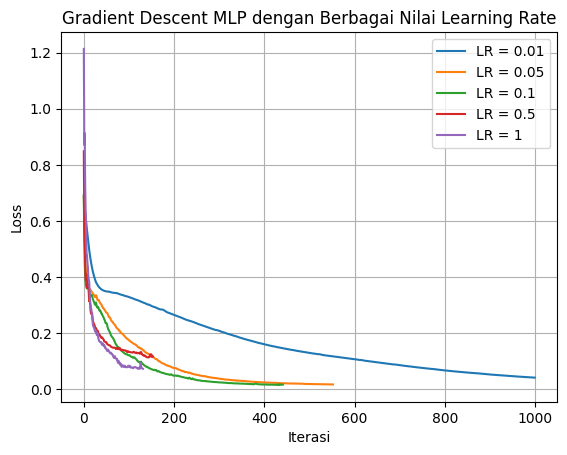

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                            label, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]
print('========< HEART Dataset >========')

for learning_rate in learning_rates:
    model = MLP(tol=0, hidden_layer_sizes=(10), activation='logistic', 
                          learning_rate_init=learning_rate, random_state=0, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nHasil untuk learning rate = {learning_rate}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    plt.plot(model.loss_curve_, label=f"LR = {learning_rate}")
    
plt.title('Gradient Descent MLP dengan Berbagai Nilai Learning Rate')
plt.xlabel('Iterasi')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### 4. Gambarkan Gradient Descent hasil percobaan yang dilakukan.

### 5. Tambahkan hasil Accuracy, Recall, Precision, F1-score pada percobaan